In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras 
from tensorflow.keras.applications.xception import decode_predictions

In [3]:
data = "/Users/leiyuhan/Desktop/archive/dataset/" # REPLACE WITH YOUR PATH

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        data + '/training_set/',
        target_size=(299,299),
        batch_size=32,
        class_mode='binary')

test_generator = train_datagen.flow_from_directory(
        data + '/test_set/',
        target_size=(299,299),
        batch_size=32,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


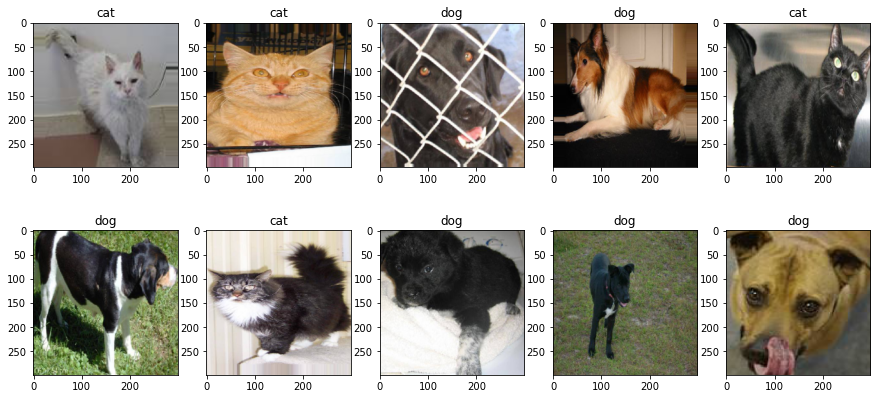

In [6]:
images,labels = next(train_generator)
labels = ['cat' if i == 0 else 'dog' for i in labels]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (15,7))
for idx, ax in enumerate(axes.flatten()):
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    
plt.show()

In [7]:
base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False

2023-03-02 18:55:44.611363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


83683744/83683744 [==============================] - 22s 0us/step


In [8]:
model = tf.keras.models.Sequential([base_model])
model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))    


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = 'accuracy')

In [10]:
model.fit(train_generator, epochs =10, steps_per_epoch = 25,validation_data=test_generator )

Epoch 1/10
25/25 [==============================] - 394s 16s/step - loss: 0.1103 - accuracy: 0.9650 - val_loss: 0.0272 - val_accuracy: 0.9930
Epoch 2/10
25/25 [==============================] - 302s 12s/step - loss: 0.0200 - accuracy: 0.9950 - val_loss: 0.0323 - val_accuracy: 0.9920
Epoch 3/10
25/25 [==============================] - 332s 14s/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0296 - val_accuracy: 0.9925
Epoch 4/10
25/25 [==============================] - 338s 14s/step - loss: 0.0263 - accuracy: 0.9937 - val_loss: 0.0262 - val_accuracy: 0.9940
Epoch 5/10
25/25 [==============================] - 331s 14s/step - loss: 0.0225 - accuracy: 0.9912 - val_loss: 0.0250 - val_accuracy: 0.9940
Epoch 6/10
25/25 [==============================] - 320s 13s/step - loss: 0.0310 - accuracy: 0.9912 - val_loss: 0.0288 - val_accuracy: 0.9950
Epoch 7/10
25/25 [==============================] - 320s 13s/step - loss: 0.0495 - accuracy: 0.9875 - val_loss: 0.0441 - val_accuracy: 0.9890
Epoch 

In [11]:
model.save('./saved_model',save_format = 'h5')

1/1 [==============================] - 1s 934ms/step


Text(0.5, 1.0, "Predicted : ['dog'], Real :dog")

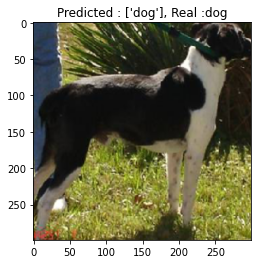

In [12]:
images,labels = next(test_generator)
labels = ['cat' if i == 0 else 'dog' for i in labels]
img = images[0]
image = tf.expand_dims(img, axis=0)
pred = model.predict(image)
pred = ['cat' if i <=0.5 else 'dog' for i in pred]
plt.imshow(image[0,...])
plt.title(f'Predicted : {str(pred)}, Real :{labels[0]}')